# Classification of Histopathology Images
### Adam Aharony.
#### Deep Learning, 2020 Spring Semester with Dr. Jonathan Rubin, Holon Institute of Technology.

In [1]:
# Importing necessary modules
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.metrics import confusion_matrix
from seaborn import heatmap 
from sklearn.manifold import TSNE

## Data preparation:

In [5]:
# Loading our dataset using tensorflow_datasets:
ds, ds_info = tfds.load("colorectal_histology", split="train", with_info=True)
ds_np = tfds.as_numpy(ds)

Now, we need to convert the dataset to two numpy arrays that contain the images, and their labels:

In [6]:
images = np.zeros((5000, 150, 150, 3), dtype=np.uint8)   # init base image array
labels = np.zeros((5000), dtype=np.uint8)
for i, example in zip(range(5000), ds_np):
  images[i, :, :, :] = example["image"]
  labels[i] = example["label"]

### Sorting the Data:

We choose our validation set, and then get our train set accordingly:
- We use the first 70 images of each category as our validation set (11,2% validation).

In [7]:
# Divide our dataset by category:
images_tumor = []   # 0
images_stroma = []   # 1
images_complex= []   # 2
images_lympho = []   # 3
images_debris = []   # 4
images_mucosa = []   # 5
images_addipose = []   # 6
images_empty = []   # 7

# Sorting by category
for i in range(5000):
  if labels[i] == 0:
    images_tumor.append(images[i])
  elif labels[i] == 1:
    images_stroma.append(images[i])
  elif labels[i] == 2:
    images_complex.append(images[i])
  elif labels[i] == 3:
    images_lympho.append(images[i])
  elif labels[i] == 4:
    images_debris.append(images[i])
  elif labels[i] == 5:
    images_mucosa.append(images[i])
  elif labels[i] == 6:
    images_addipose.append(images[i])
  elif labels[i] == 7:
    images_empty.append(images[i])

# Converting to ndarray:  
images_tumor = np.array(images_tumor, dtype=np.uint8)
images_stroma = np.array(images_stroma, dtype=np.uint8)
images_complex = np.array(images_complex, dtype=np.uint8)
images_lympho = np.array(images_lympho, dtype=np.uint8)
images_debris = np.array(images_debris, dtype=np.uint8)
images_mucosa = np.array(images_mucosa, dtype=np.uint8)
images_addipose = np.array(images_addipose, dtype=np.uint8)
images_empty = np.array(images_empty, dtype=np.uint8)

### Assembling the validation and train sets:

In [8]:
validation_images = []
validation_labels = []
validation_images.extend(images_tumor[:70])
validation_labels.extend([0]*70)
validation_images.extend(images_stroma[:70])
validation_labels.extend([1]*70)
validation_images.extend(images_complex[:70])
validation_labels.extend([2]*70)
validation_images.extend(images_lympho[:70])
validation_labels.extend([3]*70)
validation_images.extend(images_debris[:70])
validation_labels.extend([4]*70)
validation_images.extend(images_mucosa[:70])
validation_labels.extend([5]*70)
validation_images.extend(images_addipose[:70])
validation_labels.extend([6]*70)
validation_images.extend(images_empty[:70])
validation_labels.extend([7]*70)

validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)
validation_images.shape, validation_labels.shape

((560, 150, 150, 3), (560,))

In [9]:
train_images = []
train_labels = []
train_images.extend(images_tumor[70:])
train_labels.extend([0]*555)
train_images.extend(images_stroma[70:])
train_labels.extend([1]*555)
train_images.extend(images_complex[70:])
train_labels.extend([2]*555)
train_images.extend(images_lympho[70:])
train_labels.extend([3]*555)
train_images.extend(images_debris[70:])
train_labels.extend([4]*555)
train_images.extend(images_mucosa[70:])
train_labels.extend([5]*555)
train_images.extend(images_addipose[70:])
train_labels.extend([6]*555)
train_images.extend(images_empty[70:])
train_labels.extend([7]*555)

train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_images.shape, train_labels.shape

((4440, 150, 150, 3), (4440,))

## Defining and training the model:

We are going to use the VGG16 model architecture, with a 64 neuron Dense layer before the output layer:

In [8]:
vgg16 = keras.applications.VGG16(input_shape=(150, 150, 3), include_top=False)
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(8, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 520       
Total params: 15,239,560
Trainable params: 15,239,560
Non-trainable params: 0
_________________________________________________________________


Exporting a model schematic to use in the poster:

In [9]:
plot_model(model, to_file='media/plots/model_plot.eps', show_shapes=True, show_layer_names=True)

ValueError: Cannot embed the 'eps' image format

In [21]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(validation_images, validation_labels))

Epoch 1/20
  2/139 [..............................] - ETA: 19s - loss: 0.6529 - accuracy: 0.7188WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0500s vs `on_train_batch_end` time: 0.1160s). Check your callbacks.


139/139 [==============================] - 24s 173ms/step - loss: 0.5307 - accuracy: 0.8014 - val_loss: 0.7134 - val_accuracy: 0.7411
Epoch 2/20
139/139 [==============================] - 24s 172ms/step - loss: 0.5008 - accuracy: 0.8173 - val_loss: 0.6306 - val_accuracy: 0.7696
Epoch 3/20
139/139 [==============================] - 24s 171ms/step - loss: 0.4450 - accuracy: 0.8405 - val_loss: 0.6916 - val_accuracy: 0.7250
Epoch 4/20
139/139 [==============================] - 24s 169ms/step - loss: 0.4277 - accuracy: 0.8412 - val_loss: 0.6830 - val_accuracy: 0.7768
Epoch 5/20
139/139 [==============================] - 23s 168ms/step - loss: 0.4994 - accuracy: 0.8198 - val_loss: 0.7207 - val_accuracy: 0.7304
Epoch 6/20
139/139 [==============================] - 23s 168ms/step - loss: 0.4844 - accuracy: 0.8257 - val_loss: 0.7416 - val_accuracy: 0.7286
Epoch 7/20
139/139 [==============================] - 23s 169ms/step - loss: 0.4415 - accuracy: 0.8367 - val_loss: 0.5555 - val_accuracy: 0.7

### Performance Metrics:

Let's plot the model training performance metrics:

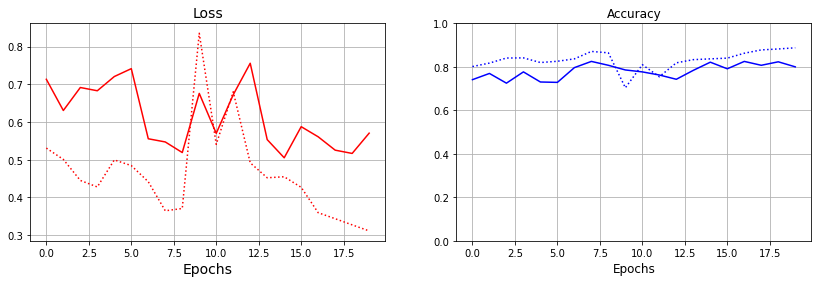

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],':r')
plt.plot(history.history['val_loss'],'r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],':b')
plt.plot(history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

Optionally, we could save the model:

In [23]:
model.save("vgg16-64-20-Adam")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: vgg16-64-20-Adam\assets


INFO:tensorflow:Assets written to: vgg16-64-20-Adam\assets


## Trying several schemes:

We could modify our model and add BatchNormalization, and DataAugmentation, while performing transfer learning on imagenet VGG16 weights, and see if we get better results while keeping the training cycle relatively quick:

The changes in the modified model are:
- Transfer learning with imagenet weights
- Data augmentation
- Batch Normalization after the primary VGG model


In [14]:
datagen = ImageDataGenerator()

datagen.fit(train_images)

In [26]:
vgg16 = tf.keras.applications.VGG16(input_shape=(150, 150, 3),
                                               include_top=False,
                                               weights='imagenet')

vgg16.trainable = False
modified_model = Sequential()
modified_model.add(vgg16)
modified_model.add(Flatten())
modified_model.add(BatchNormalization())
modified_model.add(Dense(64, activation="relu"))
modified_model.add(Dropout(0.5))
modified_model.add(Dense(8, activation="softmax"))

modified_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                524352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 520       
Total params: 15,272,328
Trainable params: 541,256
Non-trainable params: 14,731,072
____________________________________

Exporting a model schematic to use in the poster:

In [27]:
plot_model(modified_model, to_file='media/plots/modified_model_plot.eps', show_shapes=True, show_layer_names=True)

ValueError: Cannot embed the 'eps' image format

In [28]:
modified_model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

modified_history = modified_model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=20, steps_per_epoch=len(train_images)//32, validation_data=(validation_images, validation_labels))

Epoch 1/20
138/138 [==============================] - 7s 54ms/step - loss: 1.0679 - accuracy: 0.6849 - val_loss: 0.6218 - val_accuracy: 0.8268
Epoch 2/20
138/138 [==============================] - 7s 52ms/step - loss: 0.4622 - accuracy: 0.8491 - val_loss: 0.5679 - val_accuracy: 0.8536
Epoch 3/20
138/138 [==============================] - 7s 53ms/step - loss: 0.3241 - accuracy: 0.8938 - val_loss: 0.6464 - val_accuracy: 0.8589
Epoch 4/20
138/138 [==============================] - 7s 53ms/step - loss: 0.2515 - accuracy: 0.9111 - val_loss: 0.7900 - val_accuracy: 0.8607
Epoch 5/20
138/138 [==============================] - 7s 53ms/step - loss: 0.2070 - accuracy: 0.9270 - val_loss: 0.8844 - val_accuracy: 0.8732
Epoch 6/20
138/138 [==============================] - 7s 53ms/step - loss: 0.1874 - accuracy: 0.9367 - val_loss: 1.0098 - val_accuracy: 0.8625
Epoch 7/20
138/138 [==============================] - 7s 53ms/step - loss: 0.1454 - accuracy: 0.9505 - val_loss: 1.0710 - val_accuracy: 0.8589

Fine-tuning the model params:

In [29]:
vgg16.trainable = True
modified_model.summary()

modified_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

modified_history_finetune = modified_model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=20, steps_per_epoch=len(train_images)//32, validation_data=(validation_images, validation_labels))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                524352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 520       
Total params: 15,272,328
Trainable params: 15,255,944
Non-trainable params: 16,384
_____________________________________

138/138 [==============================] - 23s 167ms/step - loss: 0.1710 - accuracy: 0.9444 - val_loss: 0.9082 - val_accuracy: 0.8518
Epoch 2/20
138/138 [==============================] - 23s 166ms/step - loss: 0.3734 - accuracy: 0.8950 - val_loss: 1.0576 - val_accuracy: 0.7607
Epoch 3/20
138/138 [==============================] - 23s 166ms/step - loss: 1.2561 - accuracy: 0.5932 - val_loss: 4.3388 - val_accuracy: 0.4750
Epoch 4/20
138/138 [==============================] - 23s 165ms/step - loss: 1.0662 - accuracy: 0.6472 - val_loss: 0.9036 - val_accuracy: 0.7679
Epoch 5/20
138/138 [==============================] - 23s 166ms/step - loss: 0.7774 - accuracy: 0.7402 - val_loss: 0.7488 - val_accuracy: 0.7679
Epoch 6/20
138/138 [==============================] - 23s 165ms/step - loss: 0.6173 - accuracy: 0.7947 - val_loss: 0.6596 - val_accuracy: 0.8125
Epoch 7/20
138/138 [==============================] - 23s 166ms/step - loss: 0.5503 - accuracy: 0.8156 - val_loss: 0.6760 - val_accuracy: 0.8

### Performance Metrics:

Let's plot the modified model training performance metrics:

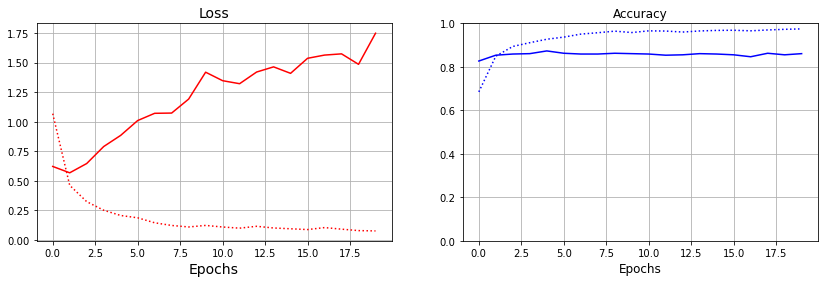

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(modified_history.history['loss'],':r')
plt.plot(modified_history.history['val_loss'],'r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(modified_history.history['accuracy'],':b')
plt.plot(modified_history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

After fine-tuning:

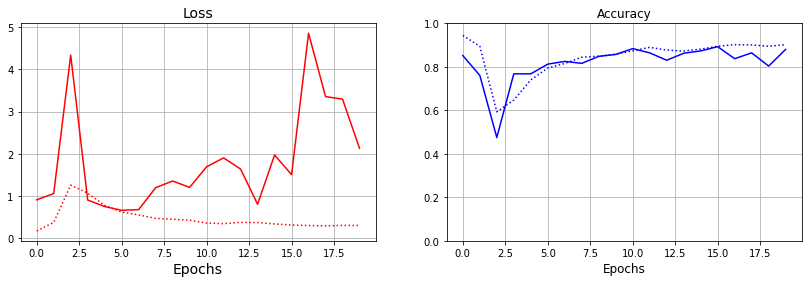

In [34]:
# Fine tune
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(modified_history_finetune.history['loss'],':r')
plt.plot(modified_history_finetune.history['val_loss'],'r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(modified_history_finetune.history['accuracy'],':b')
plt.plot(modified_history_finetune.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

Optionally, we could save the modified model:

In [35]:
modified_model.save("modified-20-Adam")

INFO:tensorflow:Assets written to: modified-20-Adam\assets


INFO:tensorflow:Assets written to: modified-20-Adam\assets


## Model Properties:

After we've seen that the modified model is even more Accurate than the initial model, we will use it and show its properties:

### Confusion Matrix:

We do the confusion matrix calculation process just like in lectures and excercises:

In [10]:
labels_1hot = modified_model.predict(validation_images)
labels_predict = np.argmax(labels_1hot, axis=1)

M = confusion_matrix(validation_labels, labels_predict)
Mhat = M / M.sum(axis=1)
Mhat

array([[0.97142857, 0.        , 0.01428571, 0.01428571, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.82857143, 0.1       , 0.01428571, 0.05714286,
        0.        , 0.        , 0.        ],
       [0.02857143, 0.15714286, 0.77142857, 0.02857143, 0.        ,
        0.01428571, 0.        , 0.        ],
       [0.        , 0.        , 0.07142857, 0.91428571, 0.        ,
        0.01428571, 0.        , 0.        ],
       [0.        , 0.11428571, 0.01428571, 0.        , 0.85714286,
        0.01428571, 0.        , 0.        ],
       [0.01428571, 0.        , 0.01428571, 0.04285714, 0.        ,
        0.92857143, 0.        , 0.        ],
       [0.01428571, 0.02857143, 0.        , 0.        , 0.05714286,
        0.01428571, 0.82857143, 0.05714286],
       [0.        , 0.01428571, 0.        , 0.        , 0.04285714,
        0.        , 0.        , 0.94285714]])

We use the 'heatmap' function to plot the confusion matrix, just like in prior excercises:

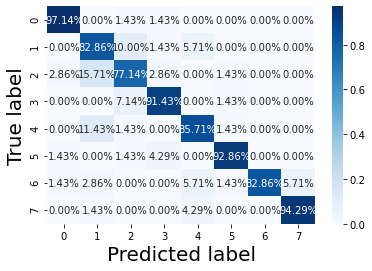

In [11]:
fig = plt.figure()
heatmap(Mhat, cmap='Blues', annot=True, fmt='.2%')
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.show()
fig.savefig("media/plots/confusion_matrix.eps", filetype="eps")

### Features Vector:

We do the feature extraction process just like in lectures and excercises:

In [15]:
features_extractor = keras.Model(inputs=modified_model.inputs, outputs=modified_model.layers[-2].output)
gen = datagen.flow(validation_images, validation_labels)
features = features_extractor.predict(gen)
features.shape

(560, 64)

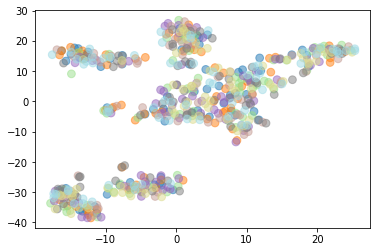

In [16]:
features_2D = TSNE(n_components=2).fit_transform(features)

fig = plt.figure()
plt.scatter(features_2D[:,0], features_2D[:,1], s=60, c=validation_labels, 
            cmap='tab20', alpha=0.5)
plt.show()
fig.savefig("media/plots/features_vector.eps", filetype="eps")

## Testing the Model on a Bigger Picture:

### Loading models from saved model files:

In [2]:
model = keras.models.load_model("vgg16-64-20-Adam")
modified_model = keras.models.load_model("modified-20-Adam")

### Dividing a Big Picture to an Appropriate Size:

In order to properly grid our 5000x5000x3 image to 150x150x3 sized grids, we need to add padding and make our image 5100x5100x3 (5100/150=34)

In [3]:
# Loading our dataset using tensorflow_datasets:
ds, ds_info = tfds.load("colorectal_histology_large", split="test", with_info=True)
ds_np = tfds.as_numpy(ds)

large_images_pad = np.zeros((10, 5100, 5100, 3), dtype=np.uint8)   # init base image array
for i, example in zip(range(10), ds_np):
  large_images_pad[i, 50:5050, 50:5050, :] += example["image"]

### Prediction:

#### Colour Visualisation:

We define a "dictionary" of mask colours, just like specified in the presentation:

In [6]:
predict_colours = [(255, 0, 0), (0, 255, 0), (255, 255, 0), (0, 0, 255), (127, 0, 255), (200, 200, 200), (150, 150, 150), (50, 50, 50)]
predict_labels = ["Tumor", "Stroma", "Complex", "Lympho", "Debris", "Mucosa", "Addipose", "Empty"]
predict_mask = np.zeros((10, 5100, 5100, 3), dtype=np.uint8) 
tumor_mask = np.zeros((10, 5100, 5100), dtype=np.float64()) 
for i in range(10):   # Iterating on images
  for n in range(150, 5100, 150):   # Iterating on rows
    for k in range(150, 5100, 150):   # Iterating on cols
      grid = large_images_pad[i, n-150:n, k-150:k]
      # Getting the model prediction for the specific grid tile:
      pred = modified_model.predict(grid[None])
      # Colouring the tile in the appropriate colour:
      predict_mask[i, n-150:n+1, k-150:k+1] = predict_colours[int(np.argmax(pred, axis=1))]
      # Adding the tile tumor certainty to the mask:
      tumor_mask[i, n-150:n+1, k-150:k+1] = pred[0, 0]
  print(i)  

0
1
2
3
4
5
6
7
8
9


Plotting the large image alongside the prediction map:

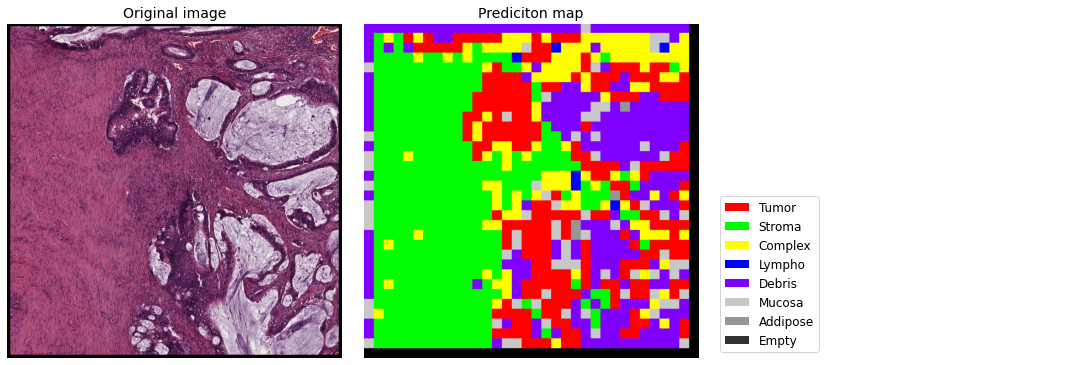

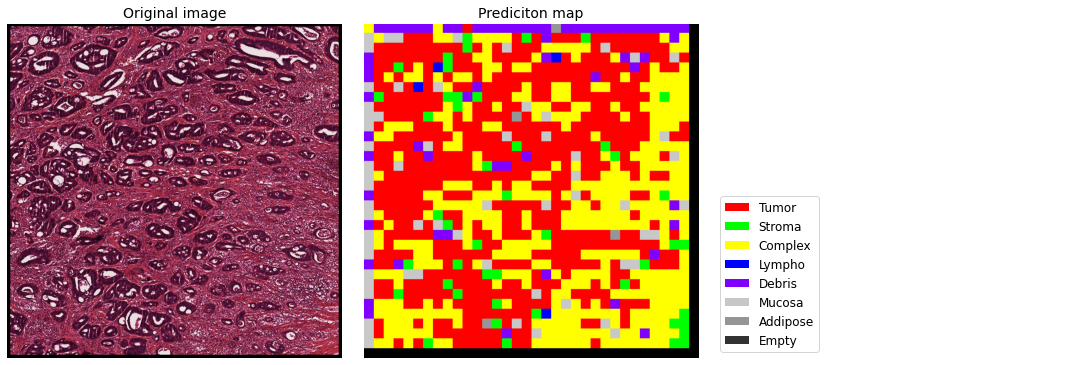

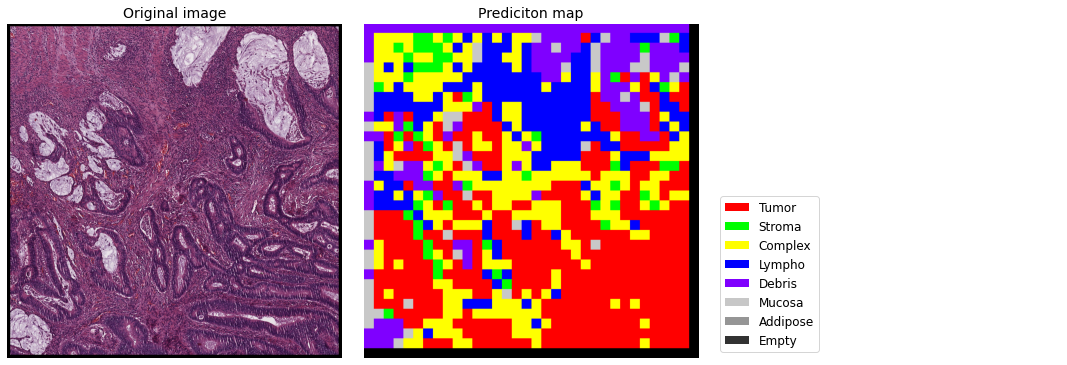

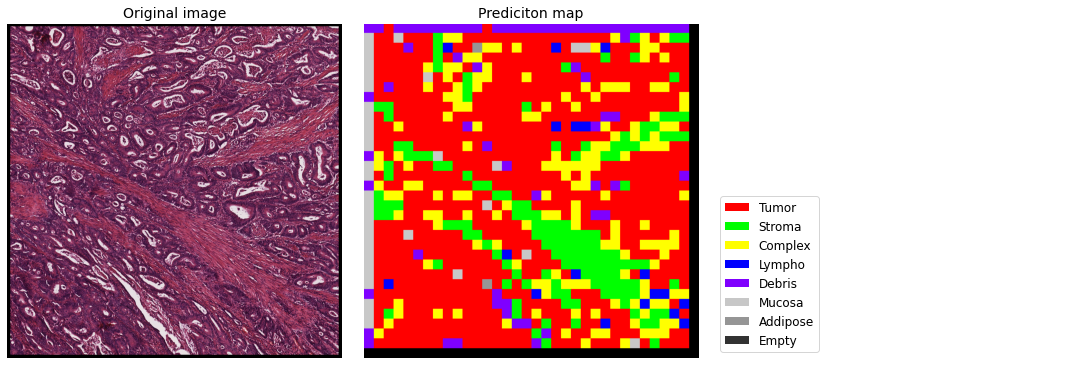

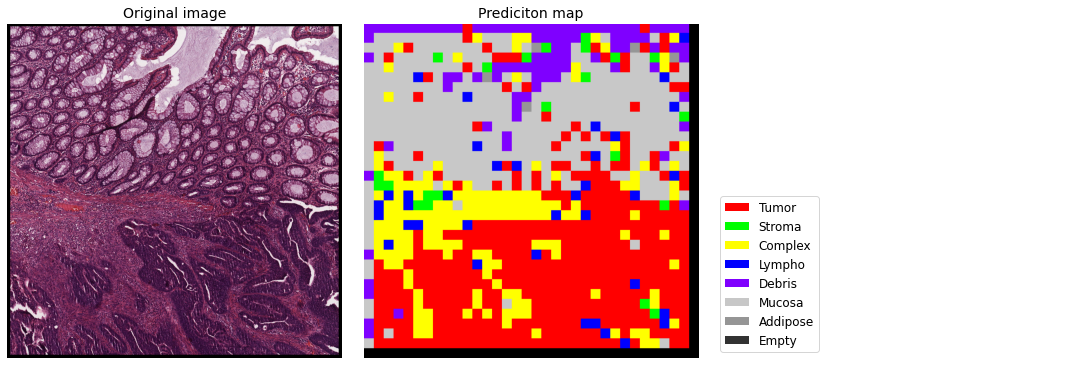

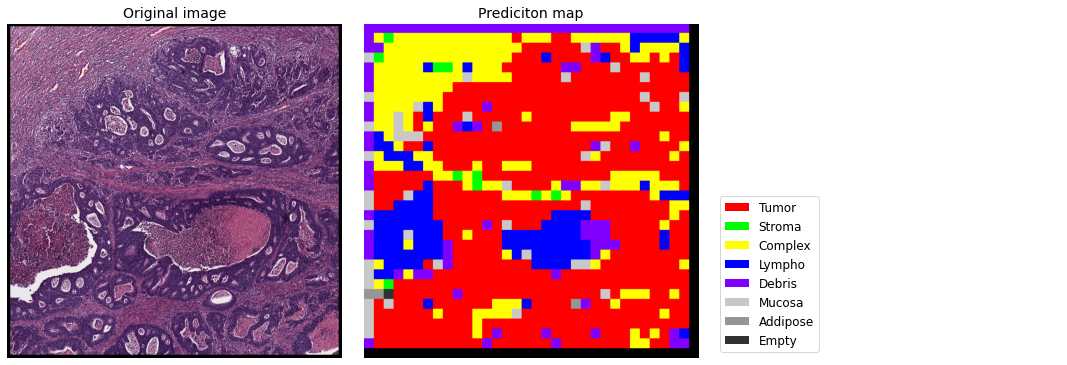

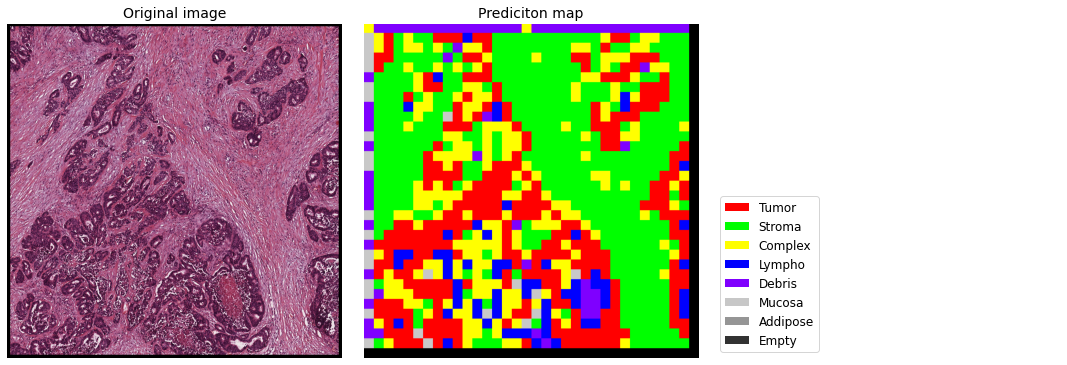

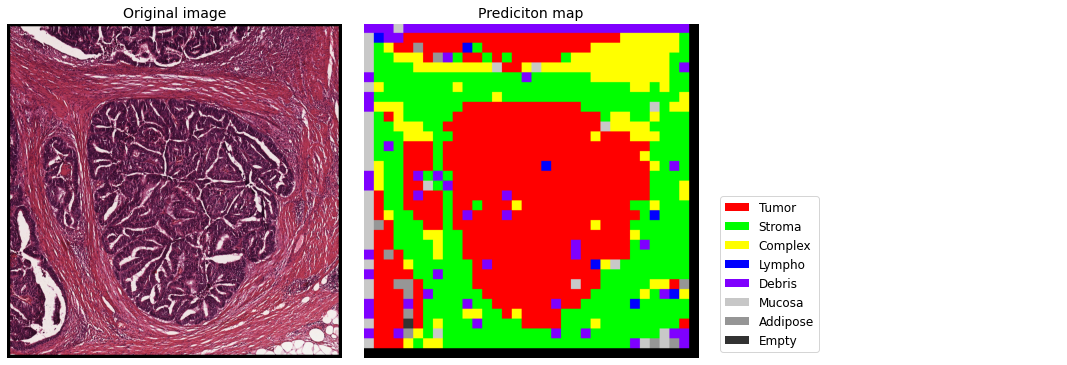

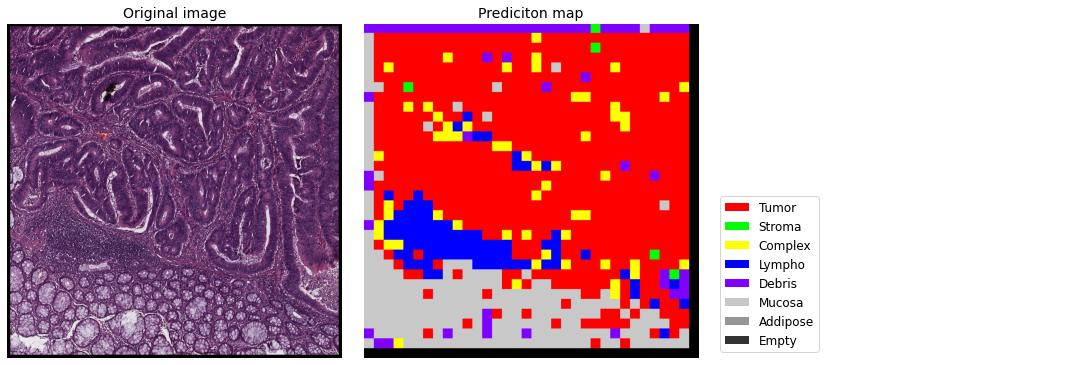

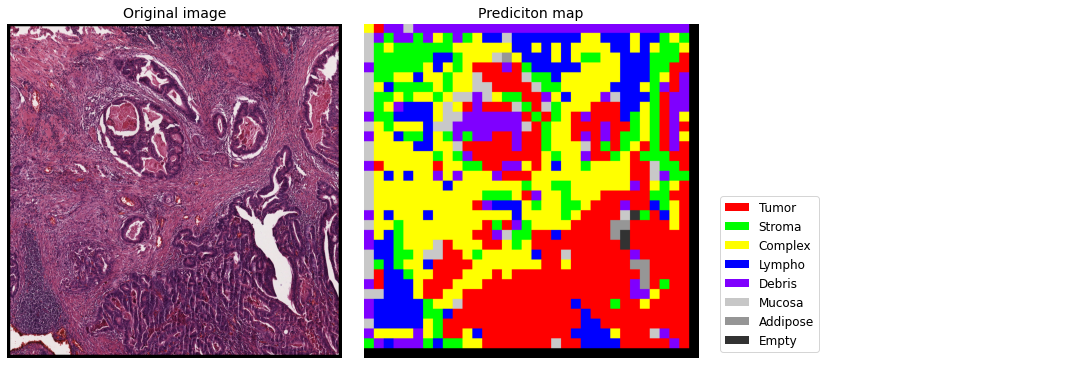

In [20]:
for i in range(10):
  fig = plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  plt.axis("off")
  plt.imshow(large_images_pad[i])
  plt.title('Original image',fontsize=14)

  plt.subplot(1,3,2)
  plt.axis("off")
  plt.imshow(predict_mask[i])
  plt.title('Prediciton map',fontsize=14)

  plt.subplot(1, 3, 3)
  plt.axis("off")
  legend_elements = []
  for colour, label in zip(predict_colours, predict_labels):
    legend_elements.append(Patch(facecolor=np.array(colour)/256, label=label))
  plt.legend(handles=legend_elements, loc='lower left', fontsize=12)
  fig.tight_layout()
  plt.show()  
  fig.savefig(f"media/large/large{i}.eps", filetype="eps")

#### Heatmap Visualisation:

We define the matrix that contains the amount of "tumor certainty":

Plotting the large image alongside the certainty map:

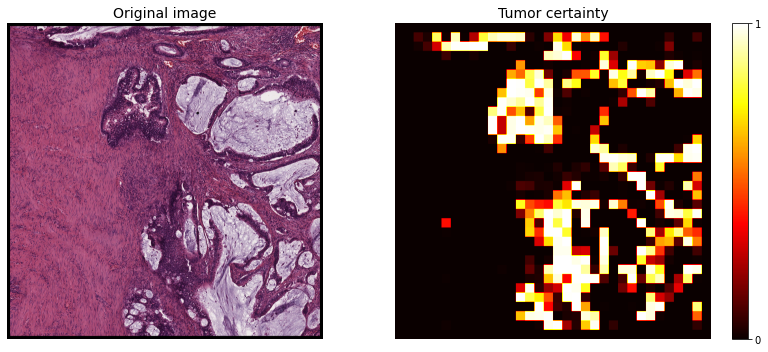

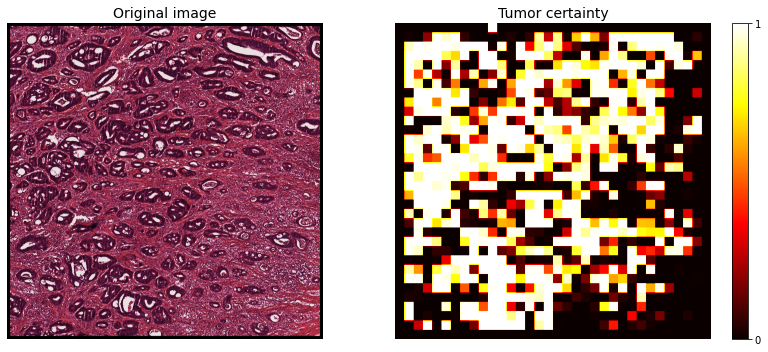

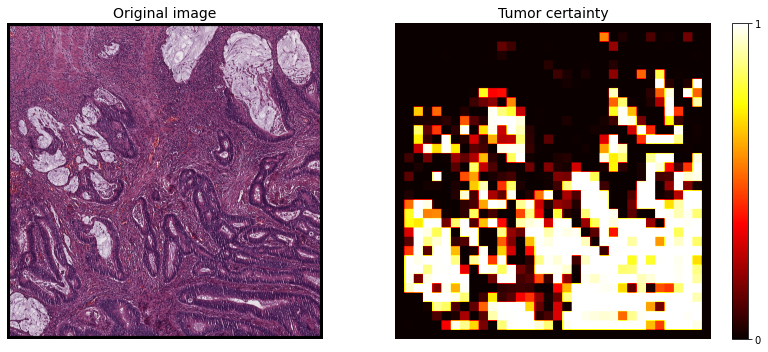

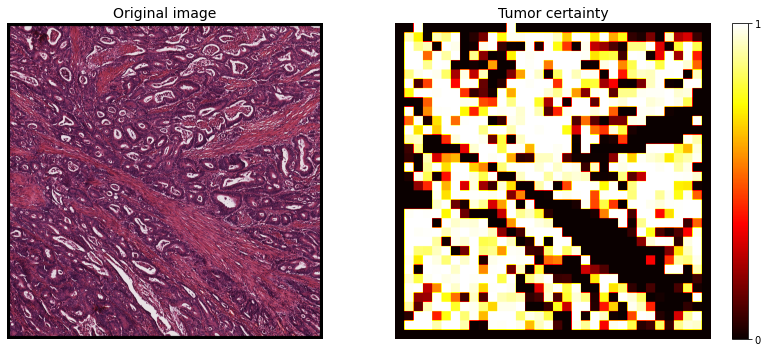

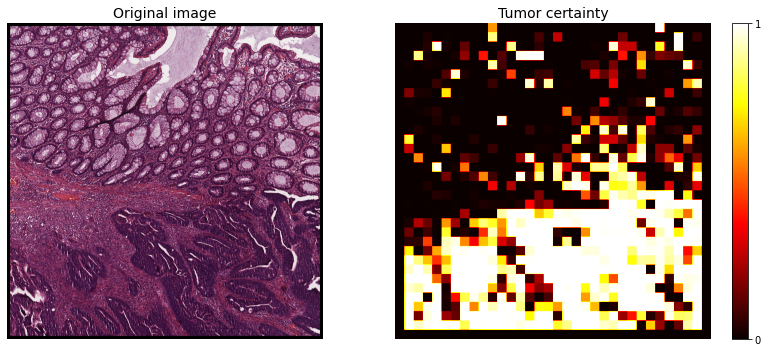

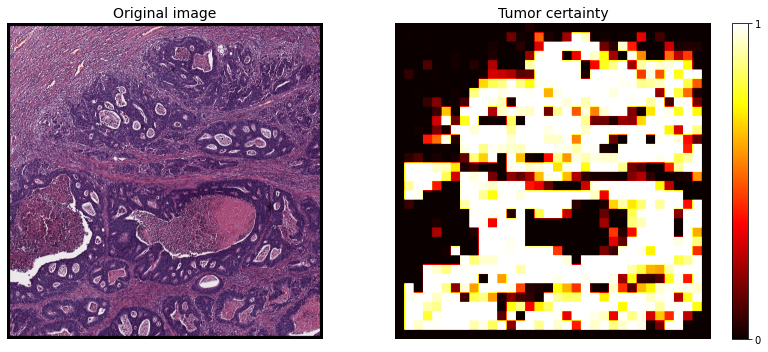

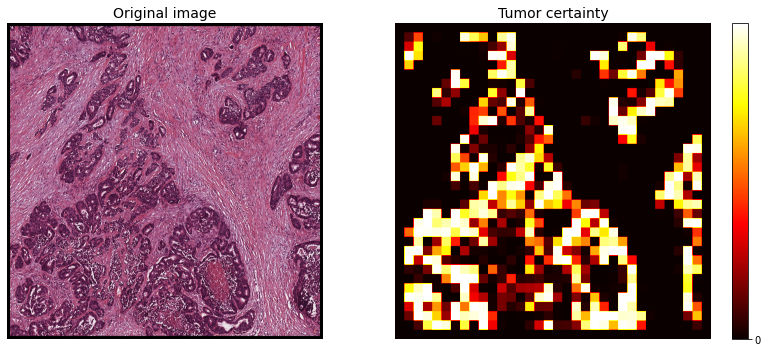

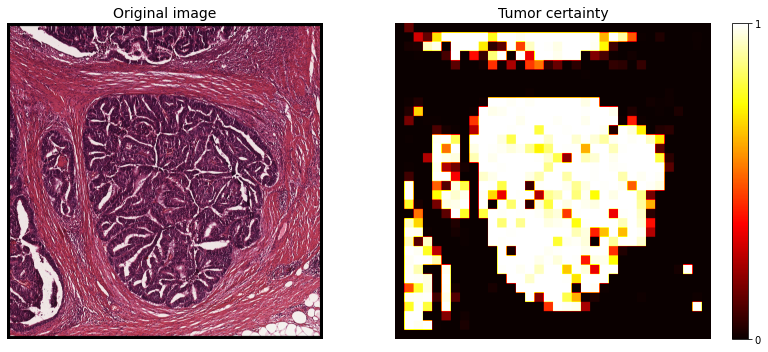

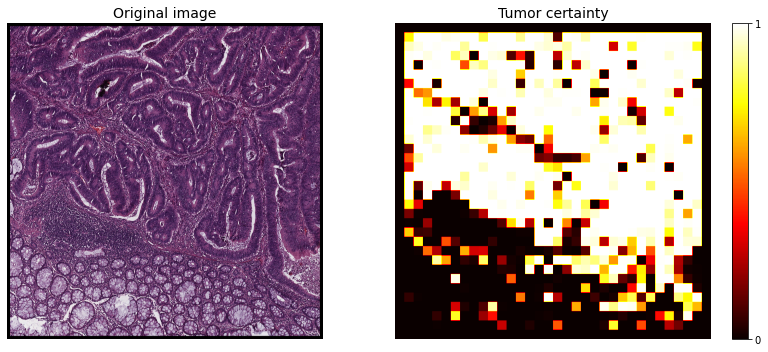

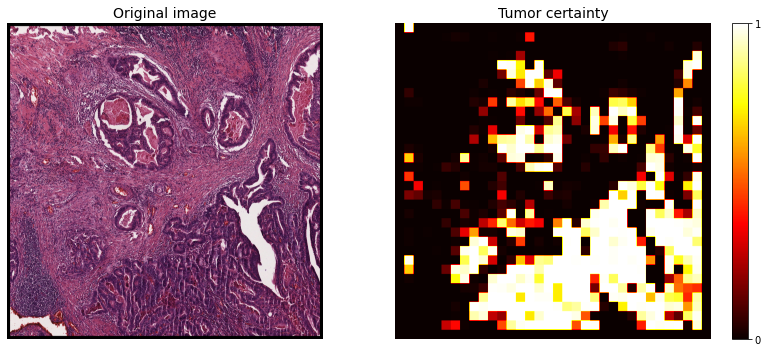

In [21]:
for i in range(10):
  fig = plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  plt.axis("off")
  plt.imshow(large_images_pad[i])
  plt.title('Original image',fontsize=14)

  plt.subplot(1,2,2)
  plt.axis("off")
  plt.imshow(tumor_mask[i], cmap="hot")
  plt.colorbar(ticks=[0, tumor_mask.max()])
  plt.title('Tumor certainty',fontsize=14)
  fig.tight_layout()
  plt.show()  
  fig.savefig(f"media/large-heatmap/large{i}.eps", filetype="eps")

## References:
1. Deep Learning Course Excercises and Class Work.

2. colorectal_histology Dataset Page on Tensorflow Datasets (https://www.tensorflow.org/datasets/catalog/colorectal_histology).

3. colorectal_histology_large Dataset Page on Tensorflow Datasets (https://www.tensorflow.org/datasets/catalog/colorectal_histology_large).

4. Tensorflow Documentation (https://www.tensorflow.org/api_docs/python/tf).

5. Keras Documentation (https://keras.io/api/).

6. NumPy Documentation (https://numpy.org/doc/).

7. Matplotlib Documentation (https://matplotlib.org/stable/contents.html).